# Chapter 3
In this chapter we take a closer look at neuroelectro data, and we also look at the quality of chapter 1 optimizer fits from this perspective


In [1]:
from neuronunit.optimisation.optimization_management import data_versus_optimal

consider installing pynn a heavier backend
glif python Error


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
result_RAW = pickle.load(open('RAWall_data_tests.p','rb'))
result_ADEXP = pickle.load(open('ADEXPall_data_tests.p','rb'))
result_RAW = result_RAW['RAW']


In [3]:
#type(result_ADEXP['ADEXP']['olf'][0])
ad_olf_dtc = result_ADEXP['ADEXP']['olf'][0].dtc
ad_purkine_dtc = result_ADEXP['ADEXP']['purkine'][0].dtc
ad_ca1pyr_dtc = result_ADEXP['ADEXP']['ca1pyr'][0].dtc
ad_ca1basket_dtc = result_ADEXP['ADEXP']['ca1basket'][0].dtc
ad_neo_dtc = result_ADEXP['ADEXP']['neo'][0].dtc

In [4]:
#type(result_ADEXP['ADEXP']['olf'][0])
olf_dtc = result_RAW['olf'][0]
purkine_dtc = result_RAW['purkine'][0]
ca1pyr_dtc = result_RAW['ca1pyr'][0]
ca1basket_dtc = result_RAW['ca1basket'][0]
neo_dtc = result_RAW['neo'][0]


RAW_dtc = {}
ADEXP_dtc = {}
#type(result_ADEXP['ADEXP']['olf'][0])
RAW_dtc = {}
RAW_dtc['Cerebellum Purkinje cell'] = result_RAW['purkine']
RAW_dtc['Olfactory bulb (main) mitral cell'] = result_RAW['olf']
RAW_dtc['Hippocampus CA1 pyramidal cell'] = result_RAW['ca1pyr']
RAW_dtc['Neocortex pyramidal cell layer 5-6'] = result_RAW['neo']
RAW_dtc['Hippocampus CA1 basket cell'] = result_RAW['ca1basket']

ADEXP_dtc = {}
ADEXP_dtc['Cerebellum Purkinje cell'] = [d.dtc for d in result_ADEXP['ADEXP']['purkine']]
ADEXP_dtc['Olfactory bulb (main) mitral cell'] = [d.dtc for d in result_ADEXP['ADEXP']['olf']]
ADEXP_dtc['Hippocampus CA1 pyramidal cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1pyr']]
ADEXP_dtc['Neocortex pyramidal cell layer 5-6'] = [d.dtc for d in result_ADEXP['ADEXP']['neo']]
ADEXP_dtc['Hippocampus CA1 basket cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1basket']]



In [5]:
#data_versus_optimal(ad_olf_dtc)
import pylab
rts,complete_map = pickle.load(open('../tests/russell_tests.p','rb'))
import numpy as np
import copy                                                                                                                                                                                         
to_norm = [v.observation for k,v in rts['Hippocampus CA1 basket cell'].items()]# for key,value in v.items() ]
#print(to_norm)
import seaborn as sns
for key,value in ca1basket_dtc.predictions.items():

    if key in ca1basket_dtc.observations.keys():
        print('in ',key)

    else:
        print('not in ',key)
        
%matplotlib inline
import matplotlib.pyplot as plt
# Make the figures big enough for the optically challenged.
plt.rcParams['figure.figsize'] = (10.0, 8.0)

#dir(ca1basket_dtc)

not in  RestingPotentialTest
in  InjectedCurrentAPThresholdTest
not in  TimeConstantTest
in  InjectedCurrentAPAmplitudeTest
not in  CapacitanceTest
in  InjectedCurrentAPWidthTest
in  RheobaseTest
not in  InputResistanceTest


In [6]:
rts,complete_map = pickle.load(open('../tests/russell_tests.p','rb'))


In [8]:
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
import urllib.request, json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


import pandas

try:
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')
    !ls -ltr *.csv
except:
    !wget https://neuroelectro.org/static/src/article_ephys_metadata_curated.csv
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')

hip = ne_raw[ne_raw['NeuronName'].str.match('Hippocampus CA1 pyramidal cell')]
#print([i for i in hip.columns])
here = ne_raw[ne_raw['TableID']==18]
#print(here['rheo_raw'])

#import pdb; pdb.set_trace()
from scipy.signal import find_peaks_cwt


from neuronunit import tests as _, neuroelectro
from neuronunit.tests import passive, waveform, fi
from neuronunit.tests.fi import RheobaseTestP
from neuronunit.tests import passive, waveform#, druckmann2013
import sciunit
from neuronunit.tests import bi_modal_test as bmt
import quantities as pq
import seaborn

try:
    with open('specific_test_data.p','rb') as f:
        contents = pickle.load(f)
        cell_name_map = contents[2]
        neuron_values = contents[0]
except:
    neuron_values, cell_name_map = bmt.specific_properties(name_map,test_map)
    with open('specific_test_data.p','wb') as f:
        #contents = 
        pickle.dump(f,[neuron_values, cell_name_map])

test_map = {1:'CapacitanceTest',2:'InputResistanceTest',3:'RestingPotentialTest',4:'TimeConstantTest',\
            5:'InjectedCurrentAPAmplitudeTest',6:'InjectedCurrentAPWidthTest',\
            7:'InjectedCurrentAPThresholdTest',8:'RheobaseTest'}

units_map = {1:pq.pF,2:pq.MOhm,3:pq.mV,4:pq.ms,\
            5:pq.mV,6:pq.ms,\
            7:pq.mV,8:pq.pA}

complete_map = {}
for k,v in units_map.items():
    complete_map[test_map[k]] = units_map[k]

name_map ={}
name_map["Cerebellum Purkinje cell"] = "sao471801888"
name_map["Dentate gyrus basket cell"] = "nlx_cell_100201"
name_map["Hippocampus CA1 basket cell"] = "nlx_cell_091205"
name_map["Neocortex pyramidal cell layer 5-6"] = "nifext_50"
name_map["Olfactory bulb (main) mitral cell"] = "nlx_anat_100201"
name_map["Hippocampus CA1 pyramidal cell"] = "sao830368389"
#ax = sns.violinplot(x="day", y="total_bill", data=tips)
inv_name_map = {v: k for k, v in name_map.items()}
executable_tests = {}
russell_tests = {}
'''
Below is instructions for making "Russell Tests"
for tt in test_classes:
    if test_map[i] in str(tt):
        #import pdb; pdb.set_trace()

        ipe_tests_path = str(os.getcwd())+'/pipe_tests.p'
        assert os.path.isfile(pipe_tests_path) == True
        with open(pipe_tests_path,'rb') as f:
            pipe_tests = pickle.load(f)

        t = tt()#neuron_values[nlex_ids][i]['modes'][0]*units_map[i])
        t.observation = {}
        t.observation['mean'] = neuron_values[nlex_ids][i]['modes'][0]*units_map[i]
        t.observation['value'] = neuron_values[nlex_ids][i]['modes'][0]*units_map[i]
        t.observation['std'] = neuron_values[nlex_ids][i]['std']*units_map[i]
        t.observation['n'] = neuron_values[nlex_ids][i]['n']
        executable_tests[cell_name][test_map[i]] =  t
        print(test_map[i],t.name)

        assert test_map[i] == t.name
        executable_tests[cell_name][test_map[i]].data = None
        executable_tests[cell_name][test_map[i]].data = neuron_values[nlex_ids][i]['values']
'''



-rw-r--r--@ 1 rjjarvis  staff  2270595 Nov 21  2017 article_ephys_metadata_curated.csv
hit 



hit 



hit 



hit 





'\nBelow is instructions for making "Russell Tests"\nfor tt in test_classes:\n    if test_map[i] in str(tt):\n        #import pdb; pdb.set_trace()\n\n        ipe_tests_path = str(os.getcwd())+\'/pipe_tests.p\'\n        assert os.path.isfile(pipe_tests_path) == True\n        with open(pipe_tests_path,\'rb\') as f:\n            pipe_tests = pickle.load(f)\n\n        t = tt()#neuron_values[nlex_ids][i][\'modes\'][0]*units_map[i])\n        t.observation = {}\n        t.observation[\'mean\'] = neuron_values[nlex_ids][i][\'modes\'][0]*units_map[i]\n        t.observation[\'value\'] = neuron_values[nlex_ids][i][\'modes\'][0]*units_map[i]\n        t.observation[\'std\'] = neuron_values[nlex_ids][i][\'std\']*units_map[i]\n        t.observation[\'n\'] = neuron_values[nlex_ids][i][\'n\']\n        executable_tests[cell_name][test_map[i]] =  t\n        print(test_map[i],t.name)\n\n        assert test_map[i] == t.name\n        executable_tests[cell_name][test_map[i]].data = None\n        executable_t

In [9]:
plt.show()

1


<Figure size 720x576 with 0 Axes>

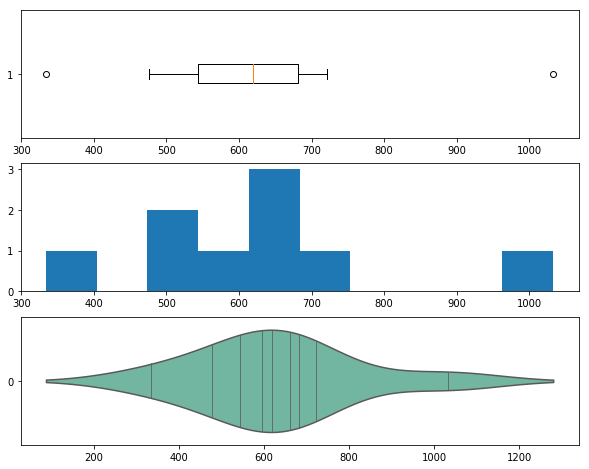

2


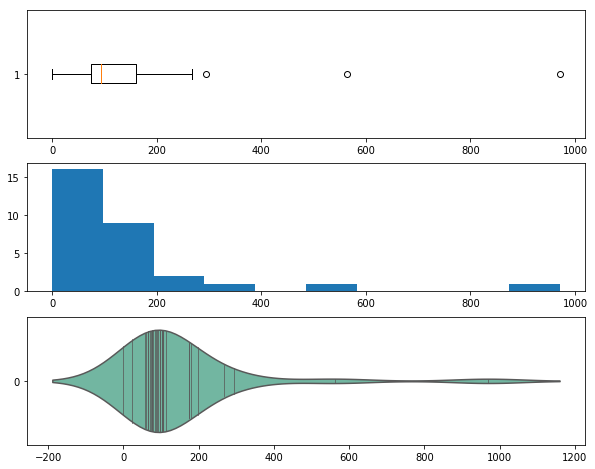

3


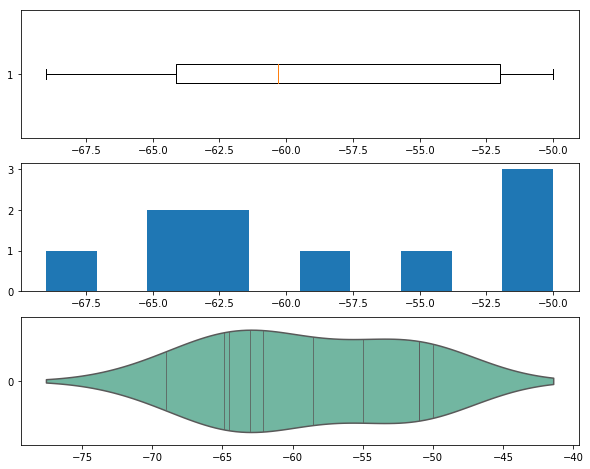

1


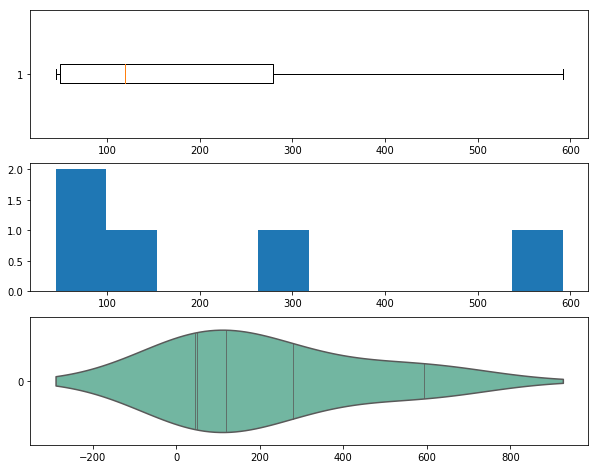

2


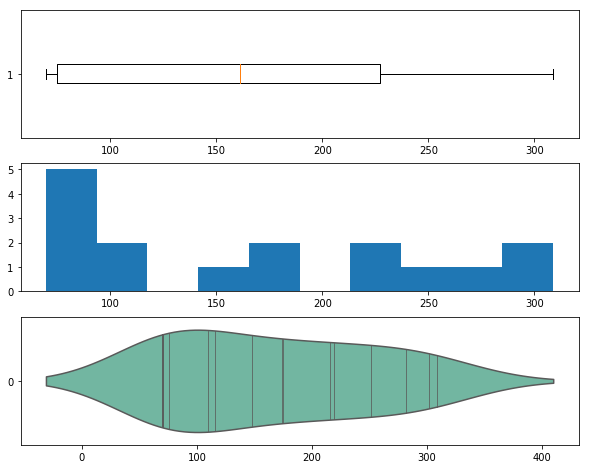

3


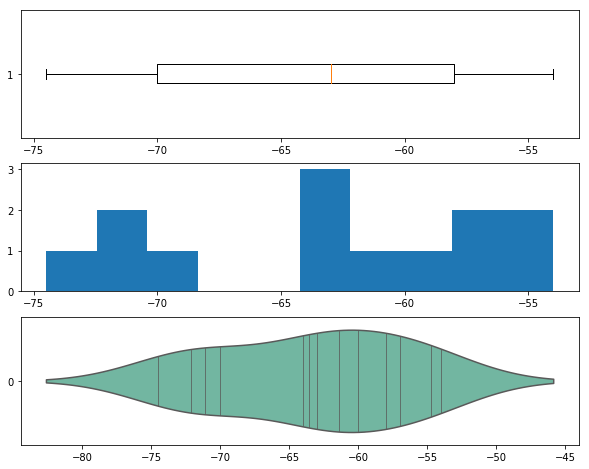

4


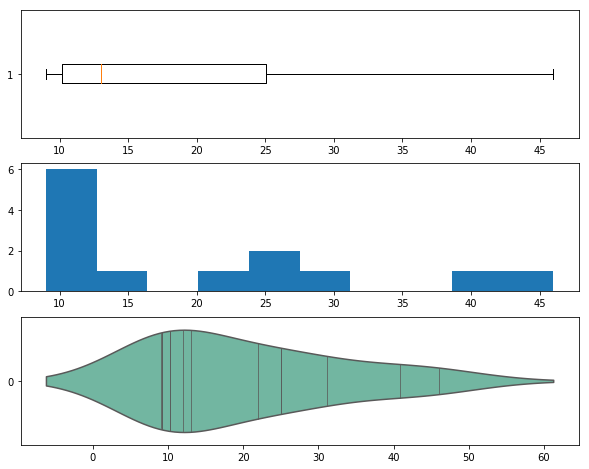

5


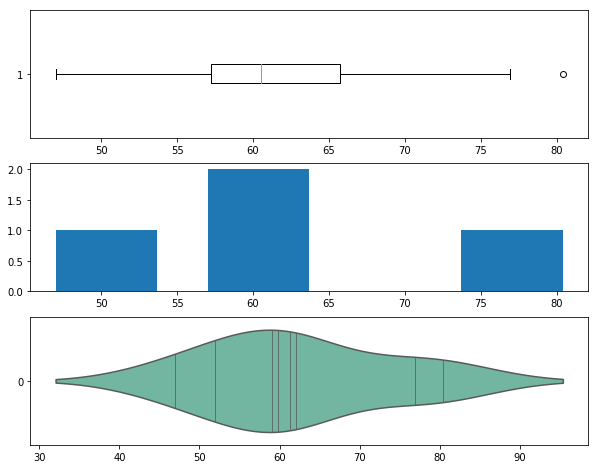

6


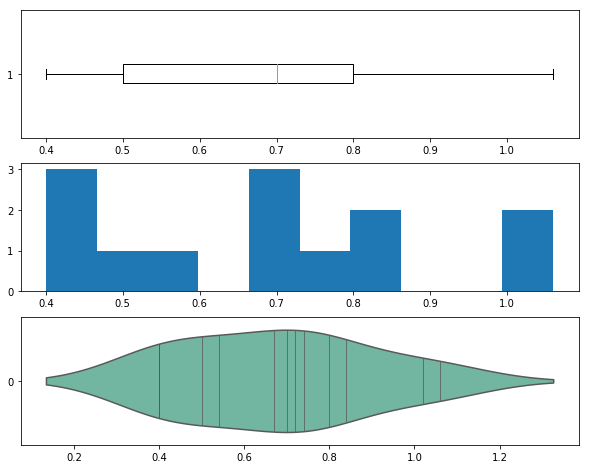

7


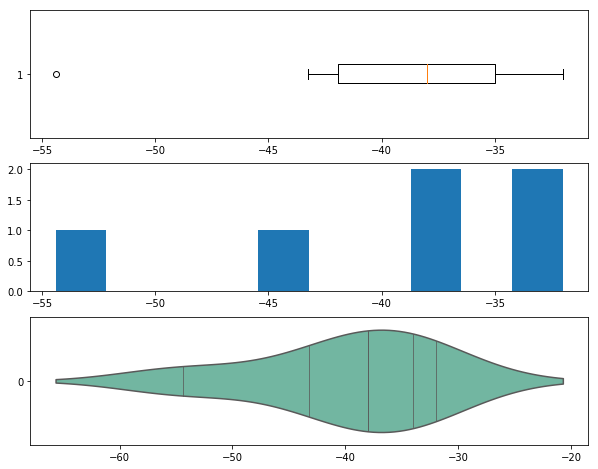

8


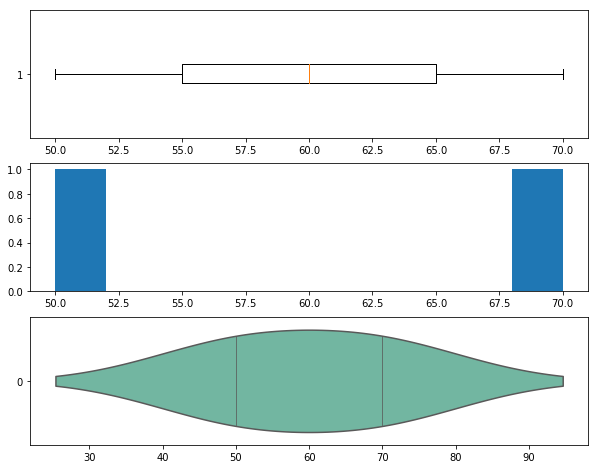

1


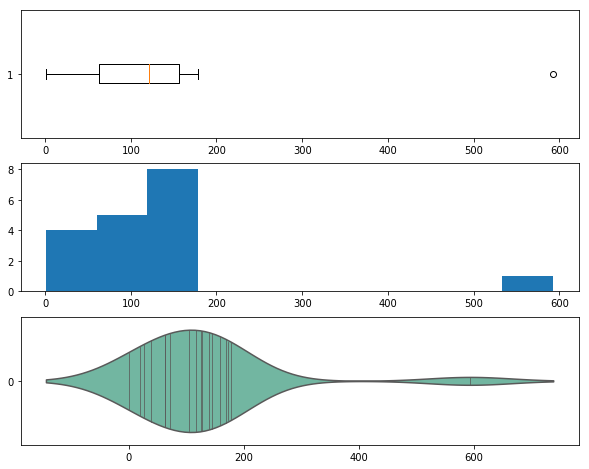

2


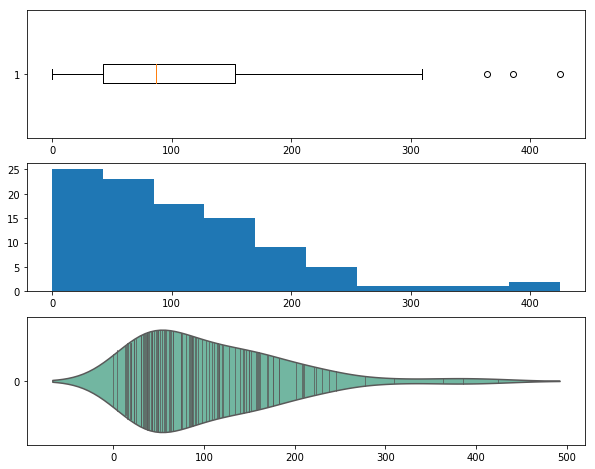

3


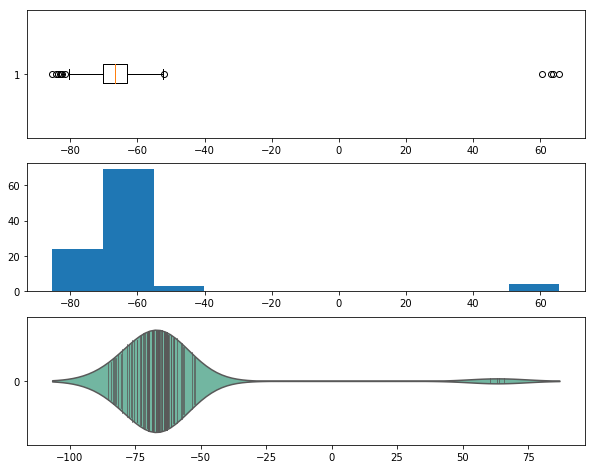

4


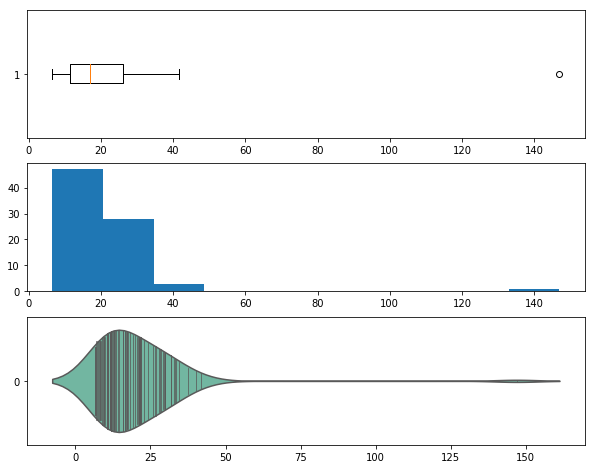

5


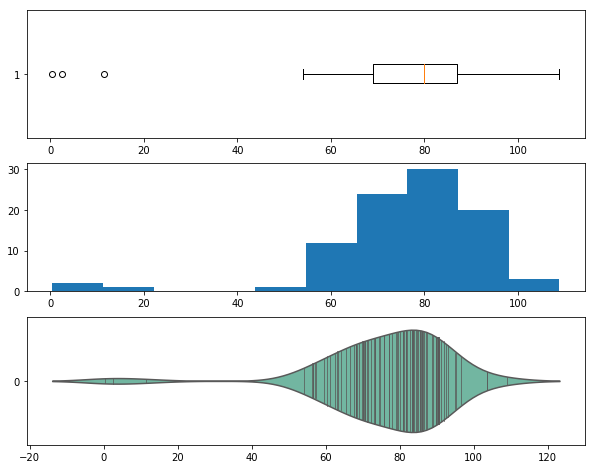

6


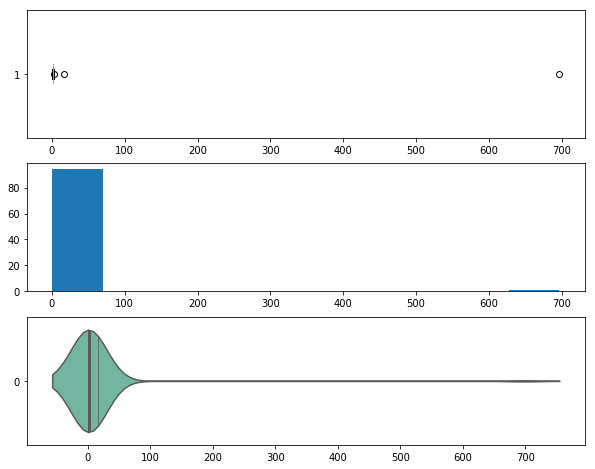

7


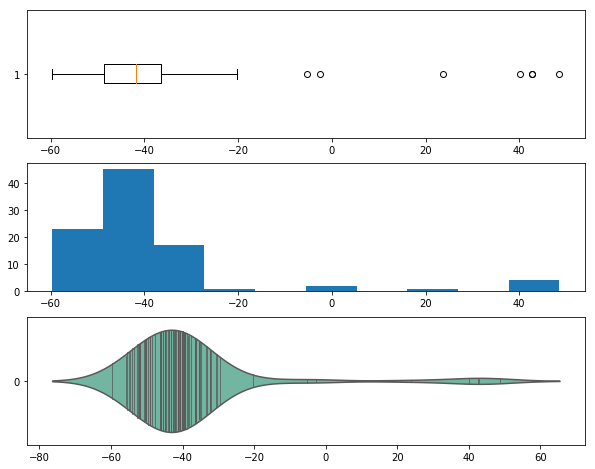

8


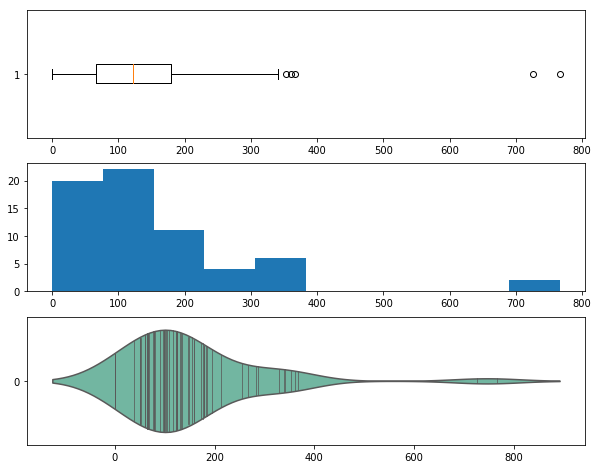

1


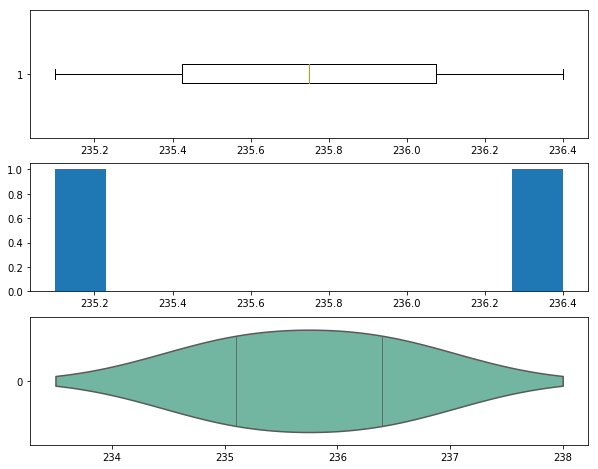

2


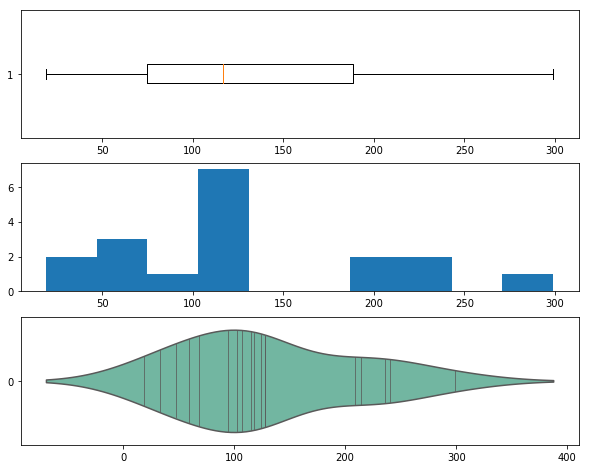

3


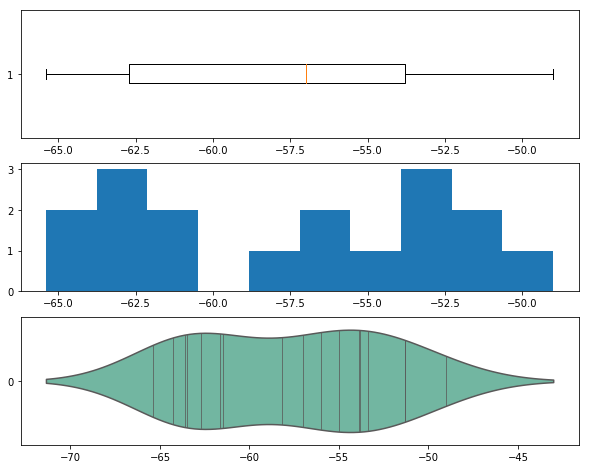

4


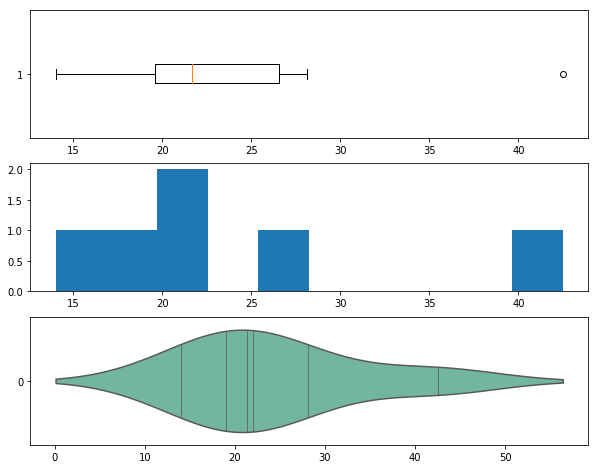

5


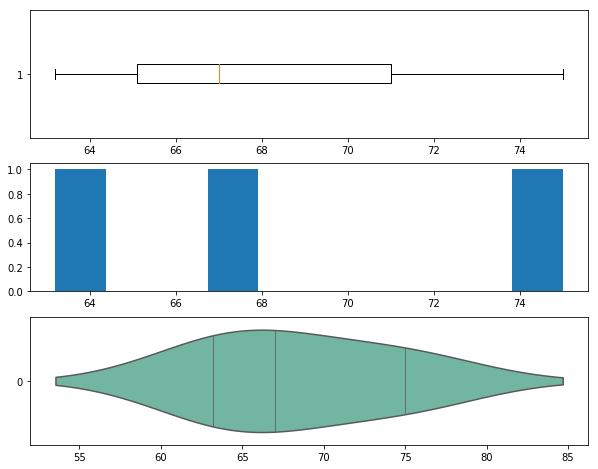

6


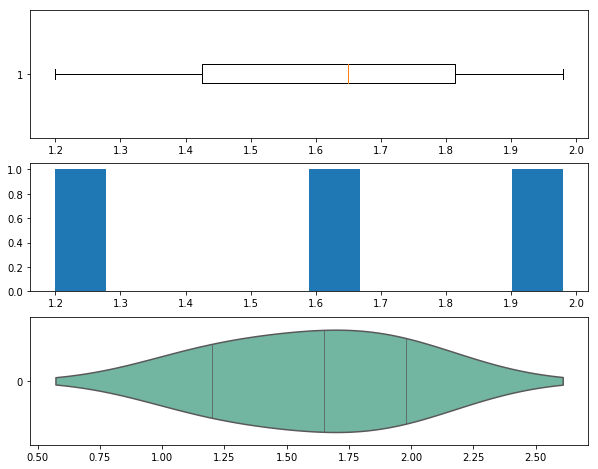

7


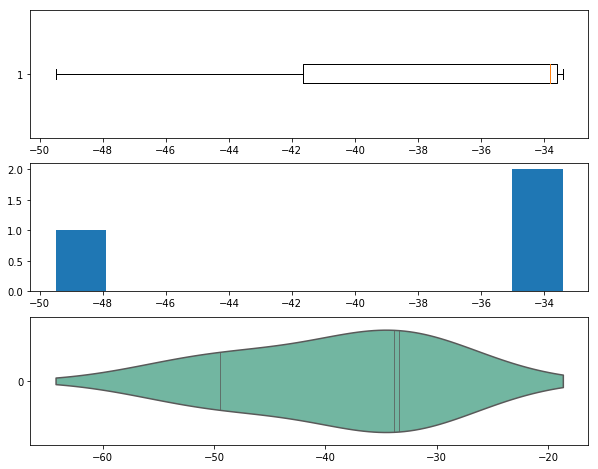

1


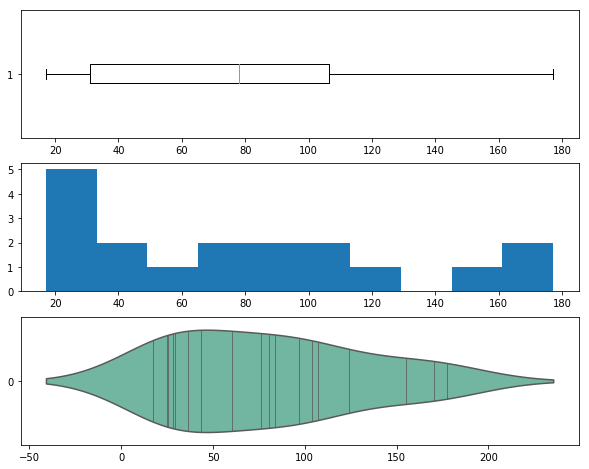

2


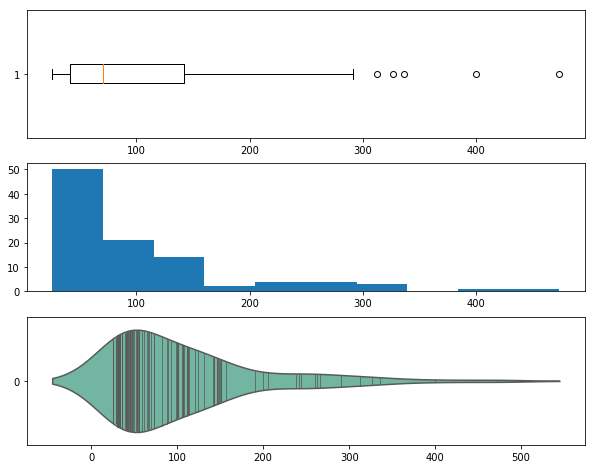

3


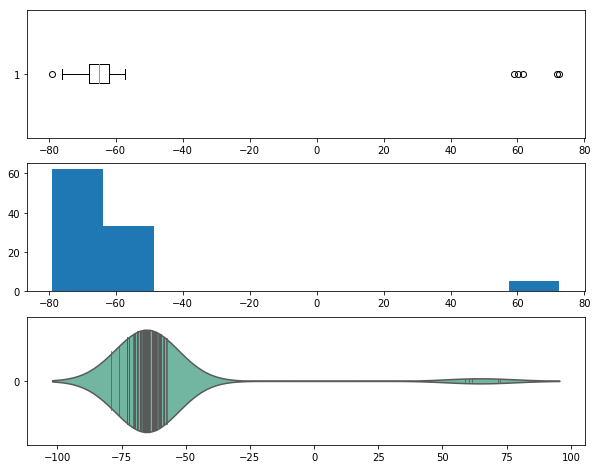

4


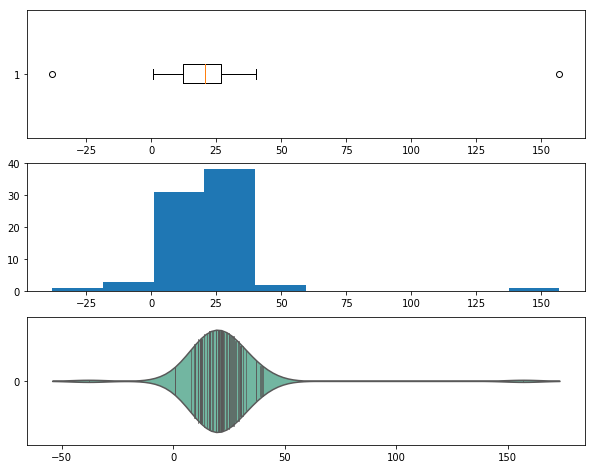

5


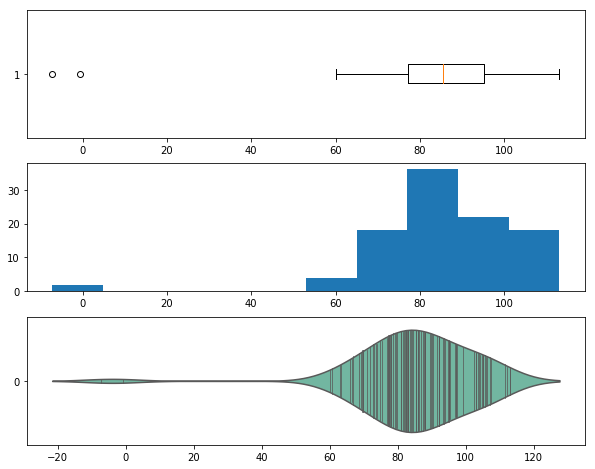

6


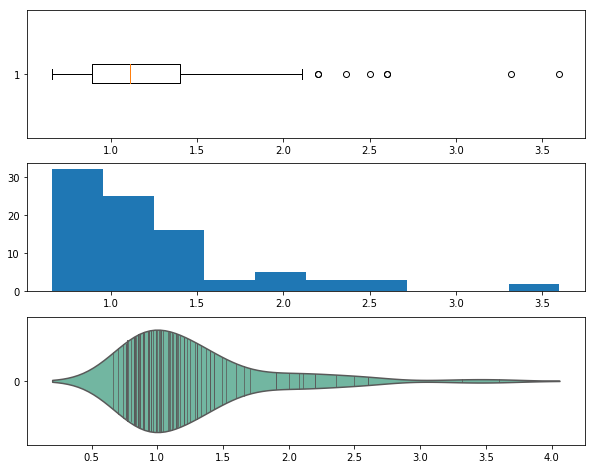

7


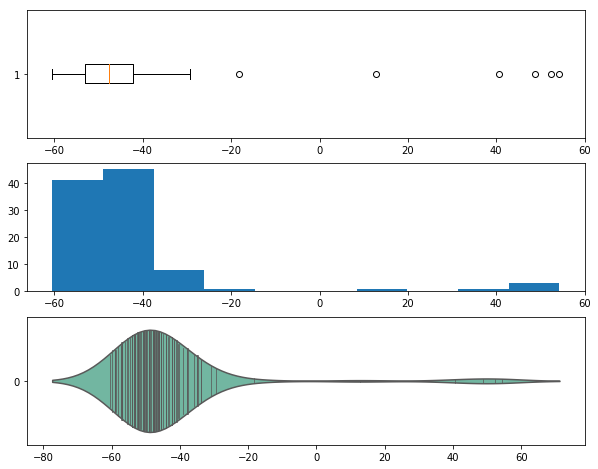

8


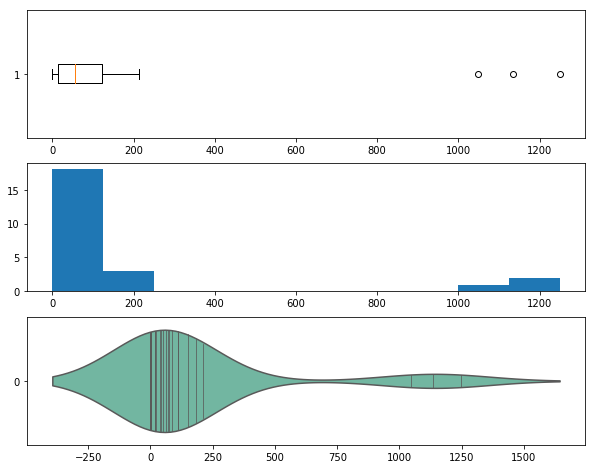

In [12]:
import matplotlib.pyplot as plt


plt.clf()

for nlex_ids,values in neuron_values.items():
    cell_name = inv_name_map[nlex_ids]
    
    executable_tests[cell_name] = {}#[test_map[i]]
    russell_tests[cell_name] = {}
    for i in neuron_values[nlex_ids].keys():
        neuron_values[nlex_ids][i]['modes'] = []

        if i==8:
            pass
            #print(i,test_map[i])
        data = sorted(neuron_values[nlex_ids][i]['values'])
        print(i)
        fig, ax = plt.subplots(3,1)

        ax[0].boxplot(data,vert=False)
        # the histogram of the data
        n, bins, patches = ax[1].hist(data, label=str(cell_name)+str(test_map[i]))

        ax[2] = sns.violinplot(data=data, palette="Set2", split=True,
                     scale="count", inner="stick",orient="h")
        #plt.legend(loc="upper left")
        #plt.savefig(str(cell_name)+str(test_map[i])+str('_hist_.png'))
        plt.show()

        #plt.clf()
        #plt.hist(sorted(neuron_values[nlex_ids][i]['values']), label=str(cell_name)+str(test_map[i]))
        #plt.show()
        #plt.savefig(str(cell_name)+str(test_map[i])+str('_violin_.png'))

        mode0 = bins[np.where(n==np.max(n))[0][0]]
        neuron_values[nlex_ids][i]['modes'].append(mode0)
        half = (bins[1]-bins[0])/2.0


        try:
            #print(sorted(n))
            #import pdb; pdb.set_trace()

            mode1 = bins[np.where(n==sorted(n)[-2])[0][0]]
            neuron_values[nlex_ids][i]['modes'].append(mode1)
            #plt.scatter(mode1+half,sorted(n)[-2],c='r')

        except:
            pass
        #max_peakind = find_peaks_cwt(bins,np.arange(1,10))
        russell_tests[cell_name][test_map[i]] = (neuron_values[nlex_ids][i]['modes'],neuron_values[nlex_ids][i]['std'],neuron_values[nlex_ids][i]['values'])

        test_classes = [fi.RheobaseTest,
                         passive.InputResistanceTest,
                         passive.TimeConstantTest,
                         passive.CapacitanceTest,
                         passive.RestingPotentialTest,
                         waveform.InjectedCurrentAPWidthTest,
                         waveform.InjectedCurrentAPAmplitudeTest,
                         waveform.InjectedCurrentAPThresholdTest]#,
